![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64
******************************
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object
******************************
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex
0              39.1             18.7              181.0       3750.0    0
1              39.5             17.4              186.0       3800.0    1
2              40.3             18.0              195.0       3250.0    1
3              36.7             19.3              193.0       3450.0    1
4              39.3             20.6              190.0       3650.0    0


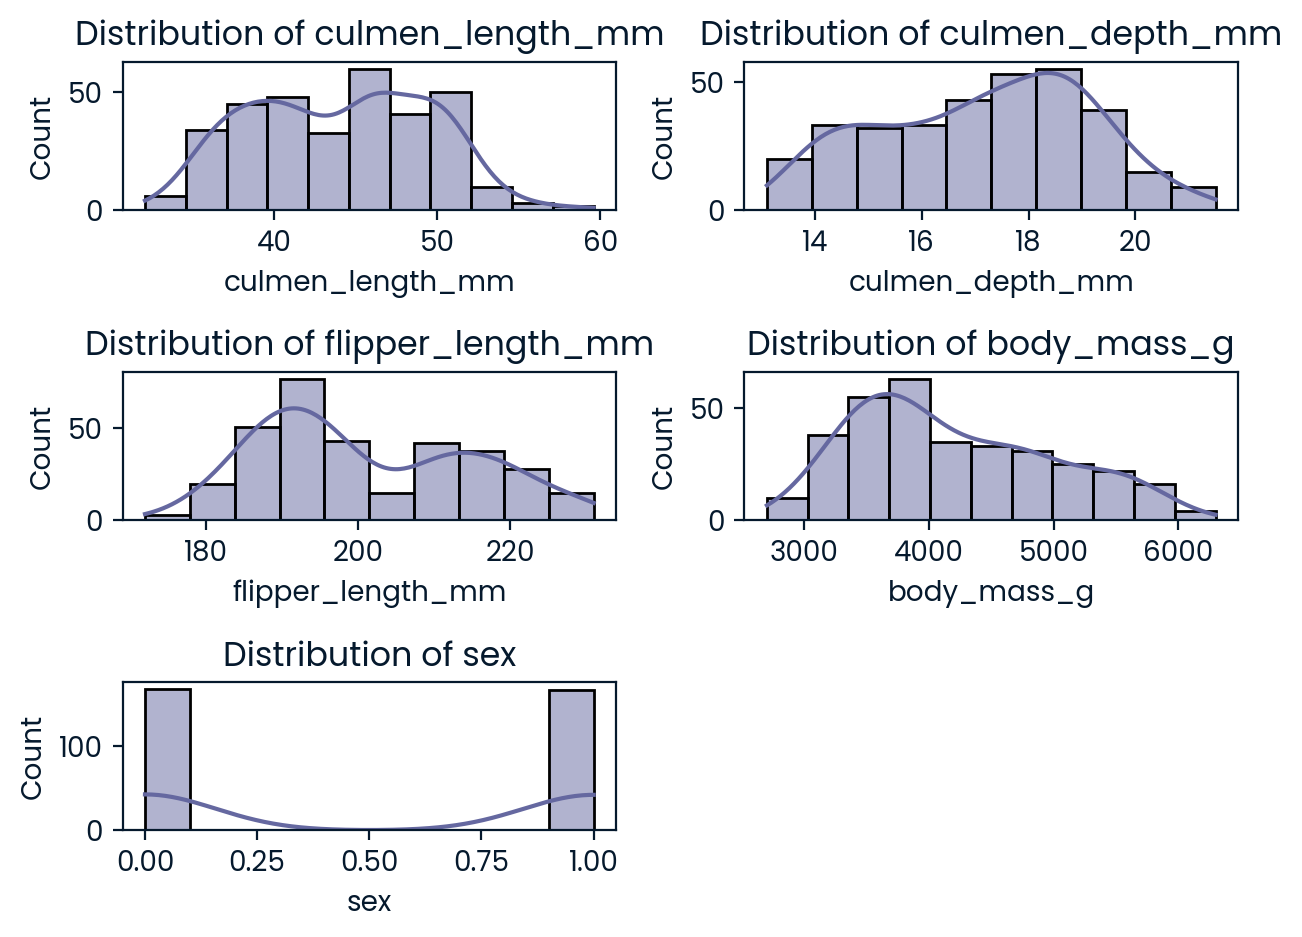

In [98]:
# Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
penguins_df = pd.read_csv("penguins.csv")
print(penguins_df.isnull().sum())
print('*'*30)
print(penguins_df.dtypes)
print('*'*30)
# changing sex to numerical: male=0, female=1
penguins_df['sex'] = penguins_df['sex'].map({'MALE':0, 'FEMALE':1})
print(penguins_df.head())

# plotting variables
fig, ax = plt.subplots(3,2)
ax = ax.ravel()
for i, col in enumerate(penguins_df.columns):
    sns.histplot(penguins_df[col], ax=ax[i], kde=True)
    ax[i].set_title(f"Distribution of {col}")
fig.delaxes(ax[5])
plt.tight_layout()
plt.show()


In [102]:
# Libs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# searching for the best n_clusters using silhouette scores
best_score = 0
best_k = 0
for k in np.arange(2,10):
    pipeline = make_pipeline(StandardScaler(), 
                            KMeans(n_clusters=k))
    labels = pipeline.fit_predict(penguins_df)
    X_scaled = pipeline[0].transform(penguins_df)
    score = silhouette_score(X_scaled, labels)

    print(f"k={k} : score={score:.3f}")

    if score > best_score:
        best_k = k
        best_score = score

# final results
print('*'*30)
print(f"the best k:{best_k}, with the score of {best_score:.3f}")

k=2 : score=0.396
k=3 : score=0.465
k=4 : score=0.517
k=5 : score=0.572
k=6 : score=0.613
k=7 : score=0.551
k=8 : score=0.482
k=9 : score=0.386
******************************
the best k:6, with the score of 0.613


In [100]:
# re-running the best estimator
pipeline = make_pipeline(StandardScaler(),
                        KMeans(n_clusters=best_k))
penguins_df['labels'] = pipeline.fit_predict(penguins_df)

# checking the relationship between sex and lables
pd.crosstab(penguins_df['labels'],penguins_df['sex'])

# producing stat_penguins
stat_penguins =  penguins_df.drop('sex', axis=1).groupby('labels').mean()
print(stat_penguins.head(6))


        culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
labels                                                                   
0              37.580769        17.575641         187.666667  3363.141026
1              49.473770        15.718033         221.540984  5484.836066
2              40.260870        19.026087         191.985507  4035.144928
3              45.563793        14.237931         212.706897  4679.741379
4              50.624324        19.270270         199.945946  3953.378378
5              47.310345        17.706897         192.758621  3569.827586
